<h3><b>DATA CHECKS.IPYNB</b><h3>
<p>Loads in one file from jatos folder</p>
<p>Allows you to quickly look at the data</p>
<p>For the sole purpose of giving prolific bonuses/approvals in real time</p>
<p>Will also allow adjustments to recruitment to be made in real time </p>
<p>Will make exclusion decisions later</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
pd.options.mode.copy_on_write = True
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)

PART 1: LOAD IN DATA

In [3]:
##this is dummy data --> created in a test runthrough of the task by the experimenter
    ##have removed all refs to prolific ID and demographic info
file_name=r"U:\Documents\Disgust learning project\Data collection\data checks\final few\jatos_files\jatos_results_20250221111653.txt"

In [4]:
#LOAD IN DATA
i = 0
with jsonlines.open(file_name) as reader: ##second pilot data
    for line in reader:
        if i ==0:
            df = pd.DataFrame(line)
            i +=1
        else:
            df = pd.concat([df, pd.DataFrame(line)])
            i +=1
df.reset_index(inplace=True)

PART 2: VIDEO RATINGS

In [5]:
rating_vids_df=df[df.trial_var=="rate_stim"]
rating_vids_df['response']=rating_vids_df['response'].replace('  ', np.nan)
rating_vids_df= rating_vids_df.dropna(subset=['response'])
rating_vids_df.sort_values(by=["stimulus", "trial_index"], inplace=True) ##groups dataframe by video type - allows you to extract 1st, 2nd and 3rd presentation of each video

In [13]:
#create a dataframe with all ratings (for one participant)
rating_vids_a=[]
rating_vids_b=[]

vals = range(len(rating_vids_df.index))

for val in vals:
    stim = str(rating_vids_df.iloc[val].stimulus)
    trial_type=rating_vids_df.iloc[val].type
    response = rating_vids_df.iloc[val].response
    unpleasant=response['Q0']
    arousing=response['Q1']
    disgusting=response['Q2']
    frightening=response['Q3']

    if "0888" in stim:
        vid="0888"
    elif "1414" in stim:
        vid="1414"
    elif "1765" in stim:
        vid="1765"
    elif "1987" in stim:
        vid="1987"
    elif "2106" in stim:
        vid="2106"
    elif "0046" in stim:
        vid = "0046"
    elif "0374" in stim:
        vid = "0374"
    elif "0548" in stim:
        vid = "0548"
    elif "0877" in stim:
        vid = "0877"
    elif "1202" in stim:
        vid = "1202"
    else:
        vid = "ERROR"

    if val in range(0, 30, 2):
        rating_vids_a.append({
            'Vid' : vid,
            'trial_type': trial_type,
            'unpleasant_1': unpleasant,
            'arousing_1': arousing,
            'disgusting_1': disgusting,
            'frightening_1': frightening,
            'disgust_stim': 0,
            'fear_stim': 0,
        })
    elif val in range(1,30,2):
        rating_vids_b.append({
            'Vid' : vid,
            'trial_type': trial_type,
            'unpleasant_2': unpleasant,
            'arousing_2': arousing,
            'disgusting_2': disgusting,
            'frightening_2': frightening,
            'disgust_stim': 0,
            'fear_stim': 0,
        })

rating_vids_a=pd.DataFrame(rating_vids_a)
rating_vids_b=pd.DataFrame(rating_vids_b)
rating_vids=rating_vids_a.merge(rating_vids_b, on=['Vid', 'trial_type', 'disgust_stim', 'fear_stim'])
rating_vids=rating_vids[['Vid', 'trial_type','unpleasant_1', 'unpleasant_2', 'arousing_1', 'arousing_2','disgusting_1', 'disgusting_2', 'frightening_1', 'frightening_2', 'disgust_stim', 'fear_stim']]

#add which video was chosen for disgust and fear stim
fear_stim=str(df.fear_stimulus.dropna())
disgust_stim=str(df.disgust_stimulus.dropna())

if "08" in disgust_stim:
       rating_vids.loc[rating_vids['Vid']=="0888", ['disgust_stim']]=1
elif "14" in disgust_stim:
       rating_vids.loc[rating_vids['Vid']=="1414", ['disgust_stim']]=1
elif "17" in disgust_stim:
       rating_vids.loc[rating_vids['Vid']=="1765", ['disgust_stim']]=1
elif "19" in disgust_stim:
       rating_vids.loc[rating_vids['Vid']=="1987", ['disgust_stim']]=1
elif "21" in disgust_stim:
       rating_vids.loc[rating_vids['Vid']=="2106", ['disgust_stim']]=1
else:
       print("error")

if "00" in fear_stim:
       rating_vids.loc[rating_vids['Vid']=="0046", ['fear_stim']]=1
elif "03" in fear_stim:
       rating_vids.loc[rating_vids['Vid']=="0374", ['fear_stim']]=1
elif "05" in fear_stim:
       rating_vids.loc[rating_vids['Vid']=="0548", ['fear_stim']]=1
elif "08" in fear_stim:
       rating_vids.loc[rating_vids['Vid']=="0877", ['fear_stim']]=1
elif "12" in fear_stim:
       rating_vids.loc[rating_vids['Vid']=="1202", ['fear_stim']]=1
else:
       print("error")

#add prolific ID
#rating_vids['prolific_id']=df[0:1].prolific_id[0]
rating_vids

,Vid,trial_type,unpleasant_1,unpleasant_2,arousing_1,arousing_2,disgusting_1,disgusting_2,frightening_1,frightening_2,disgust_stim,fear_stim
0,0888,disgust,4,6,8,8,4,4,0,3,1,0
1,1414,disgust,3,5,6,6,4,3,0,0,0,0
2,1765,disgust,0,2,0,0,0,3,0,0,0,0
3,1987,disgust,2,4,8,8,2,4,2,0,0,0
4,2106,disgust,2,1,8,6,4,8,0,1,0,0
5,0046,fear,2,4,8,8,0,0,3,5,0,0
6,0374,fear,0,2,8,8,0,0,4,5,0,0
7,0548,fear,3,3,8,7,0,4,3,4,0,1
8,0877,fear,3,6,7,2,0,0,2,2,0,0
9,1202,fear,0,0,8,8,0,0,4,5,0,0


Text(0.5, 1.0, 'Fear ratings')

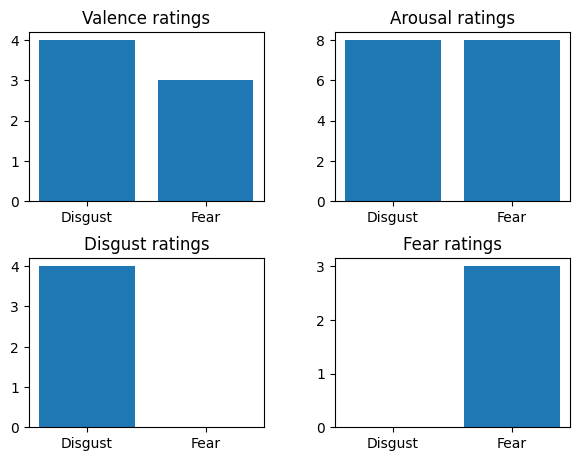

In [15]:
#Checking chosen stim
    ##want valence and arousal to be roughly similar
    ##and not rated the fear or disugst images as 0 for fear/disgust (whichever the emotion of interest is)
    
chosen_stim=pd.concat([rating_vids[rating_vids.disgust_stim==1], rating_vids[rating_vids.fear_stim==1]])
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=False)
fig.tight_layout(pad=2)

ax[0,0].bar(['Disgust', 'Fear'], [np.mean(chosen_stim[chosen_stim.trial_type=="disgust"].unpleasant_1), np.mean(chosen_stim[chosen_stim.trial_type=="fear"].unpleasant_1)])
ax[0,0].set_title("Valence ratings")

ax[0,1].bar(['Disgust', 'Fear'], [np.mean(chosen_stim[chosen_stim.trial_type=="disgust"].arousing_1), np.mean(chosen_stim[chosen_stim.trial_type=="fear"].arousing_1)])
ax[0,1].set_title("Arousal ratings")


ax[1,0].bar(['Disgust', 'Fear'], [np.mean(chosen_stim[chosen_stim.trial_type=="disgust"].disgusting_1), np.mean(chosen_stim[chosen_stim.trial_type=="fear"].disgusting_1)])
ax[1,0].set_title("Disgust ratings")

ax[1,1].bar(['Disgust', 'Fear'], [np.mean(chosen_stim[chosen_stim.trial_type=="disgust"].frightening_1), np.mean(chosen_stim[chosen_stim.trial_type=="fear"].frightening_1)])
ax[1,1].set_title("Fear ratings")

PART 3: BEHAVIOUR

In [16]:
#instructions quiz and practice % correct
task_understood=pd.DataFrame([{'instruction_repeats': np.shape(df[df.trial_type=="instructions"])[0]}])

practice_df=df[df.task=="practice_task"]
practice_df=practice_df[practice_df['correct'].notna()]
task_understood['practice_percent']=np.shape(practice_df[practice_df.correct==True])[0] / np.shape(practice_df)[0]

#task_understood['prolific_id']=df[0:1].prolific_id[0]
task_understood

,instruction_repeats,practice_percent
0,13,0.9


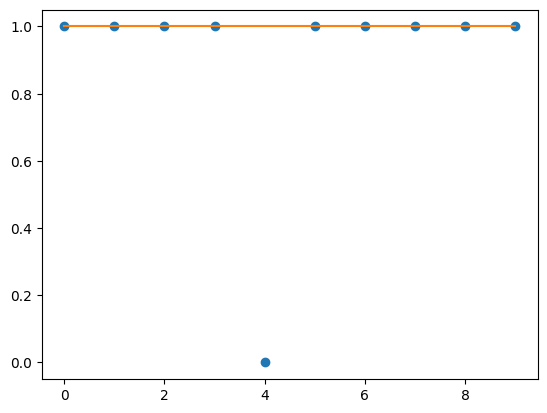

In [17]:
#plot practice decisions
plt.plot(range(0,10), practice_df.correct, 'o')
plt.plot(np.ones(10))

In [20]:
#attention checks 
attention=df[df.trial_var=="attention_check"]
index=df.index[df.trial_var=="attention_check"]
if str(attention.iloc[0].response) == "{'Q0': ['Apple', 'Banana']}":
    block1=2
elif 'Apple' in (attention.loc[0].response)['Q0'] or 'Banana' in (attention.loc[0].response)['Q0']:
            block1=1
else:
    block1=0

if str(attention.iloc[1].response)== "{'Q0': ['Bowl', 'Spoon']}":
            block2=2
elif 'Bowl' in (attention.loc[1].response)['Q0'] or 'Spoon' in (attention.loc[1].response)['Q0']:
            block2=1
else:
    block2=0

if str(attention.iloc[2].response)== "{'Q0': ['River', 'Mountain']}":
            block3=2
elif 'River' in (attention.loc[2].response)['Q0'] or 'Mountain' in (attention.loc[2].response)['Q0']:
            block3=1
else:
    block3=0

attention_checks = pd.DataFrame({
    'block': ['block 1', 'block 2', 'block 3'],
    'correct' :[block1, block2, block3]
})

task_understood['attention_checks']=np.sum(attention_checks.correct)
display(attention_checks)
print(np.sum(attention_checks.correct)) ##must be greater than or equal to 4 (i.e., they can't get more than 2 questions wrong)

KeyError: 1

In [11]:
#create dataframe with just task data
task=df[df.task=="main_task"]

In [12]:
#Checking that contingencies were correct (should e about .8) -- sanity check that the task is working
task.feedback_congruent.value_counts(normalize=True)

feedback_congruent
True     0.816514
False    0.183486
Name: proportion, dtype: float64

In [13]:
#function to create a dataframe for each block
def create_df(block_name):
    block_df=pd.DataFrame(columns=['n_trial', 'rt', 'stim_selected', 'correct_stim', 'correct', 'feedback', 'feedback_congruent', 'correct_count', 'trial_till_correct', 'reversal', 'block_no', 'prolific_id', 'timed_out'])
    block=task[task.block_type==block_name]
    block.reset_index(inplace=True)
    block.drop(['level_0', 'index'], axis=1, inplace=True)

    #extract punishment colour
    first_punishment = task.loc[task['stimulus'].str.contains(block_name, case=False, na=False), 'stimulus'].iat[0]
    if first_punishment.find('YELLOW') != -1:
        punish_colour='YELLOW'
    elif first_punishment.find('BLUE') != -1:
        punish_colour='BLUE'
    else:
        punish_colour='ERROR'

    for i in set(block.n_trial):
        trial=block[block.n_trial==i]
        trial.reset_index(inplace=True)

        row = []
        if punish_colour in trial.feedback[2]:
            feedback='incorrect'
        else:
            feedback='correct'

        row.append({
            'n_trial': trial.n_trial[0], #
            'stim_selected': trial.stim_selected[0],#
            'correct_stim': trial.correct_stim[0],#
            'correct': trial.correct[0],#
            'feedback': feedback,
            'feedback_congruent': trial.feedback_congruent[2],
            'correct_count': trial.correct_count[0],#
            'trial_till_correct': trial.trial_till_correct[0],#
            'rt': trial.rt[0],
            'reversal': trial.reversal[0],#
            'block_no': trial.block_no[0],#
            #'prolific_id': trial.prolific_id[0],#
            'timed_out': 0,
            'time_taken': (block.time_elapsed.iloc[-1]-block.time_elapsed[0])/60000 ##in minutes
        })
        block_df=pd.concat([block_df, pd.DataFrame(row)])
    block_df.reset_index(inplace=True)

    #replace stimuli with 0 and 1 (for plotting)
    stim=list(set(block_df.correct_stim.to_list()))
    stim0="<img src='"+str(stim[0])+"'</img>"
    stim0b="  <img src='"+str(stim[0])+"'</img>"
    stim1="<img src='"+str(stim[1])+"'</img>"
    stim1b="  <img src='"+str(stim[1])+"'</img>"

    block_df.replace([stim[0], stim[1]], [0, 1], inplace=True)
    block_df.replace([stim0, stim1], [0,1], inplace=True)
    block_df.replace([stim0b, stim1b], [0,1], inplace=True)

    #did they time out before reaching 7 reversals
    short_block=block[block.trial_till_correct.notna()] ##removes trials after they timed out (if they did)
    if short_block.iloc[-1].reversal==7.0 and short_block.iloc[-1].correct_count>=5:
        block_df.timed_out=0
    else:
        block_df.timed_out=1
    
    ##did reach reversal criteria for inclusion
    criteria=5
    if short_block.iloc[-1].reversal>=criteria: ##if they reached more reversals than criteria
        block_df['criteria']=0 ##pass
    else:
        block_df['criteria']=1 ##fail

    return block_df

Passed!
Met criteria


C:\Users\eb08\AppData\Local\Temp\ipykernel_8716\608250947.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  block_df=pd.concat([block_df, pd.DataFrame(row)])


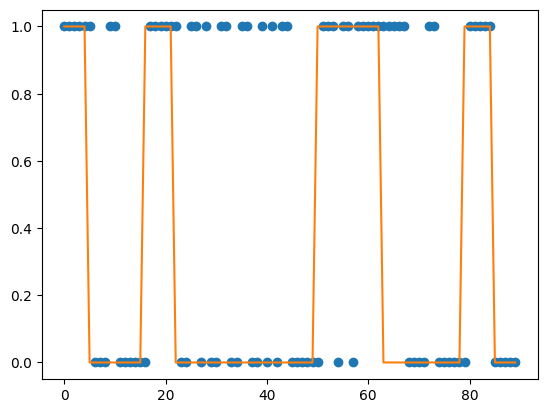

In [14]:
disgust_df=create_df("Disgust")
#disgust_df=create_block_df("Disgust")
plt.plot(disgust_df.stim_selected, 'o')
plt.plot(disgust_df.correct_stim)

if disgust_df.iloc[-1].reversal==7.0 and disgust_df.iloc[-1].correct_count==5:
    task_understood['timed_out_d']=0
    print("Passed!")
else:
    task_understood['timed_out_d']=1
    print("Timed out")

if disgust_df.iloc[0].criteria ==0:
    task_understood['criteria_d']=0
    print("Met criteria")
else:
    task_understood['criteria_d']=1
    print("Didn't meet criteria")

C:\Users\eb08\AppData\Local\Temp\ipykernel_8716\608250947.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  block_df=pd.concat([block_df, pd.DataFrame(row)])


Passed!
Met criteria


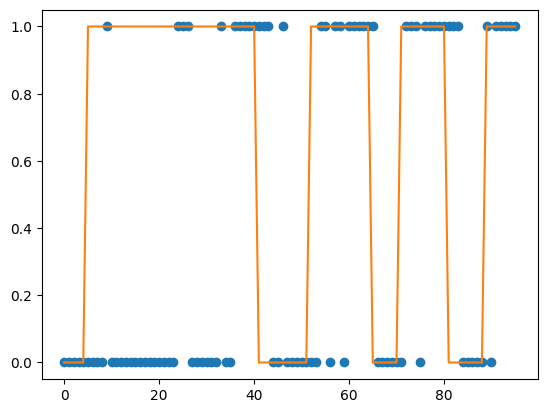

In [15]:
fear_df=create_df("Fear")
plt.plot(fear_df.stim_selected, 'o')
plt.plot(fear_df.correct_stim)

if fear_df.iloc[-1].reversal==7.0 and fear_df.iloc[-1].correct_count==5:
    task_understood['timed_out_f']=0
    print("Passed!")
else:
    task_understood['timed_out_f']=1
    print("Timed out")


if fear_df.iloc[0].criteria ==0:
    task_understood['criteria_f']=0
    print("Met criteria")
else:
    task_understood['criteria_f']=1
    print("Didn't meet criteria")

C:\Users\eb08\AppData\Local\Temp\ipykernel_8716\608250947.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  block_df=pd.concat([block_df, pd.DataFrame(row)])


Passed!
Met criteria


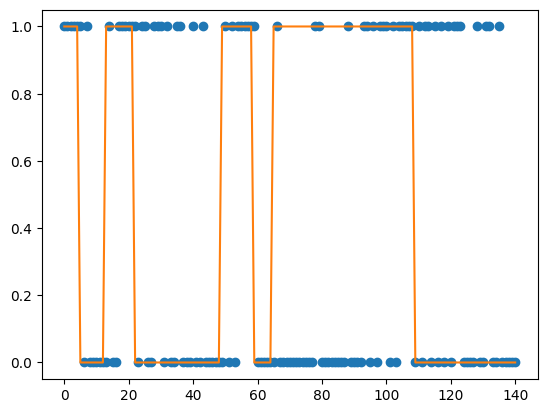

In [16]:
points_df=create_df("Points")
plt.plot(points_df.stim_selected, 'o')
plt.plot(points_df.correct_stim)


if points_df.iloc[-1].reversal==7.0 and points_df.iloc[-1].correct_count==5:
    task_understood['timed_out_p']=0
    print("Passed!")
else:
    task_understood['timed_out_p']=1
    print("Timed out")


if points_df.iloc[0].criteria ==0:
    task_understood['criteria_p']=0
    print("Met criteria")
else:
    task_understood['criteria_p']=1
    print("Didn't meet criteria")

In [17]:
criteria=task_understood['criteria_p']+task_understood['criteria_d']+task_understood['criteria_f']
task_understood['criteria_total']=criteria
print(criteria[0]) ##must be less than 3

0


In [18]:
##did they take any breaks
if len(task[task.rt/60000>10].index) ==0:
    task_understood['long_breaks']="No"
    print("no")
else:
    task_understood['long_breaks']="Yes"
    print("yes")

no


In [20]:
##Checking they learnt the task correctly
if task_understood.attention_checks[0]>=4 and task_understood.criteria_total[0]<3  and task_understood.long_breaks[0]=="No":
    task_understood['task_understood']="Yes"
    print("Task understood")
else:
    task_understood['task_understood']="No"
    print("Task failed")
task_understood

Task understood


,instruction_repeats,practice_percent,attention_checks,timed_out_d,criteria_d,timed_out_f,criteria_f,timed_out_p,criteria_p,criteria_total,long_breaks,time_elapsed,task_understood
0,1,0.4,6,0,0,0,0,0,0,0,No,No,Yes


<h3>Digit span task</h3>
<p>Check that they didn't score 0</p>

In [ ]:
def make_digit_span(df):
    digit_span=pd.DataFrame()
    for i in set(df.participant_no): 
        sub_df=df[df.participant_no==float(i)]
        digit_span_df=sub_df.dropna(subset=['digit_span']).reset_index()
        if len(digit_span_df.index)==0:
            temp_digit_span=pd.DataFrame({'digit_span': "task failed", 'participant_no': [sub_df.participant_no.iloc[0]] })
        else:
            temp_digit_span=pd.DataFrame({'digit_span': [digit_span_df.digit_span[0]], 'participant_no': [digit_span_df.participant_no[0]]})
        digit_span=pd.concat([digit_span, temp_digit_span])
    return digit_span

In [ ]:
make_digit_span(df) ##doesn't work in dummy data but will create df with digit span result - which should be greater than 1

<h3>Demography and psychiatric information</h3>
<p>Check that this matches the info prolific gives you</p>
<p>And also that the time taken was less than 120 minutes</p>

In [ ]:
##demography - missing from this dummy data so code won't work
    #will check by hand whether it matches prolific and whether time taken was >120 mins
demography=df[df.trial_var=="demography"].reset_index()
demography
demography_df = pd.DataFrame([demography.loc[0].response]).drop(["title", "final_goodbye"], axis="columns")

#add psychiatric diagnosis
ind=df.index[df.trial_var=="psychiatric diagnosis"]
diagnosis=df.iloc[ind].response[ind[0]]['Q0']
demography_df['diagnosis']=diagnosis
demography_df

In [ ]:
#load in file
demographics=pd.read_csv(r"U:\Documents\Disgust learning project\Data collection\data checks\final few\prolific_export_677ffad0acfd3c61aa6e5ee2 (4).csv", low_memory=False)

#select just this participant
prolific_id=df[0:1].prolific_id[0]
demographics=demographics[demographics['Participant id']==prolific_id]
demographics=demographics[['Time taken', 'Mental health diagnosis', 'Age', 'Sex']]
demographics.reset_index(inplace=True)
demographics

Time elapsed - did it take more than 2 hours

In [ ]:
##work out time taken from jatos -- as prolific is inaccurate
time_taken=[]
numbers=list(df.time_elapsed)
# Extract numbers that are greater than the next number
peaks = [num for i, num in enumerate(numbers[:-1]) if num > numbers[i + 1]]
peaks.append(numbers[-1])
jatos_time_taken=np.sum(peaks)/60000 
print(jatos_time_taken)
if jatos_time_taken>7200:
    print("Took more than 2 hours - EXCLUDE")
else:
    print("Didn't take more than 2 hours")

In [ ]:
import ast
points_rating=df[df.trial_var=='points_rate_stim']
points_rating.iloc[0].response